In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import warnings

In [2]:
df = pd.read_csv('Classification_Titanic.csv')

# Problem definition

Our purpose is to predict whether passengers are alive or not, by the various features of Titanic passengers. I will make a hypothesis by graphing the survival results according to various features. Then I'll remove unnecessary features and patch up missing values according to circumstances. Then, I will make a model by various ways, evaluate and compare it. In summery, Our goal is the creation and evaluation of a model that determines y variale(Survival status), by the features of people on the Titanic.



# Hypothesis construction



In [3]:
from IPython.display import Image
Image(url= "https://static1.squarespace.com/static/5006453fe4b09ef2252ba068/t/5090b249e4b047ba54dfd258/1351660113175/TItanic-Survival-Infographic.jpg?format=1500w")

Figure 1 shows that the third-class compartment, the pink border on the right, sank first. In other words, people in the third-class compartment would be relatively more likely to die, and first and two class would be less likely to die. Pclass will also be associated with fair, so the probability of death will vary depending on fair. Also, I will check the correlation graph later if there is anything related to Pclass. It is also said that the first-class compartment and the life-saving tube were close. Age and gender would also have affected survival probabilities, as there was also a cultural tendency to rescue women than men and children and the elderly than adults. It is also expected that more people who come together than alone will have a higher chance of survival by saving or cooperating with each other.

In [4]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,1,1,"Oconnor, Frankie",male,NaN,2,0,209245,27.14,C12239,S
1,1,0,3,"Bryan, Drew",male,NaN,0,0,27323,13.35,NaN,S
2,2,0,3,"Owens, Kenneth",male,0.33,1,2,CA 457703,71.29,NaN,S
3,3,0,3,"Kramer, James",male,19.00,0,0,A. 10866,13.04,NaN,S
4,4,1,3,"Bond, Michael",male,25.00,0,0,427635,7.76,NaN,S


In [5]:
df.shape

(100000, 12)

In [6]:
from sklearn.model_selection import StratifiedShuffleSplit

In [7]:
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=40)

for train_idx, test_idx in split.split(df,df['Survived']):
    train = df.loc[train_idx]
    test = df.loc[test_idx]

In [8]:
def bar_chart(feature):
    survived = train[train['Survived']==1][feature].value_counts()
    dead = train[train['Survived']==0][feature].value_counts()
    df = pd.DataFrame([survived,dead])
    df.index = ['Survived','Dead']
    df.plot(kind='bar',stacked=True, figsize=(10,5))

## Pclass

As expected in the first figure, many people died in the third class. As expected in the first picture, many people died in the third class. The first and second classes died at a similar rate. Unlike other classes where male and female rode similarly, male rode twice as much in third class as female. Most of them were embarked S in all class, but especially in the third class, Most were embarked S.

Survived,0,1,All
Pclass,,,
1,12739,17576,30315
2,13622,15057,28679
3,30865,10141,41006
All,57226,42774,100000


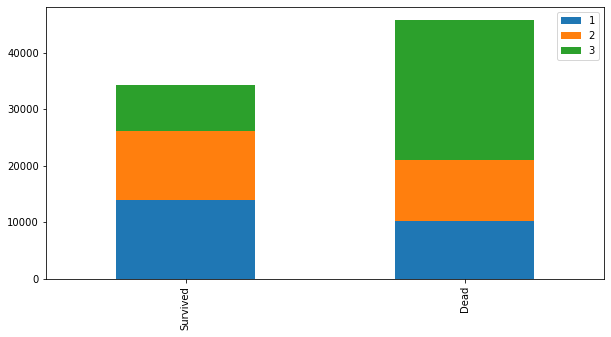

In [9]:
bar_chart('Pclass')
pd.crosstab(df['Pclass'], df['Survived'], margins=True)

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/anaconda3/lib/python3.8/si

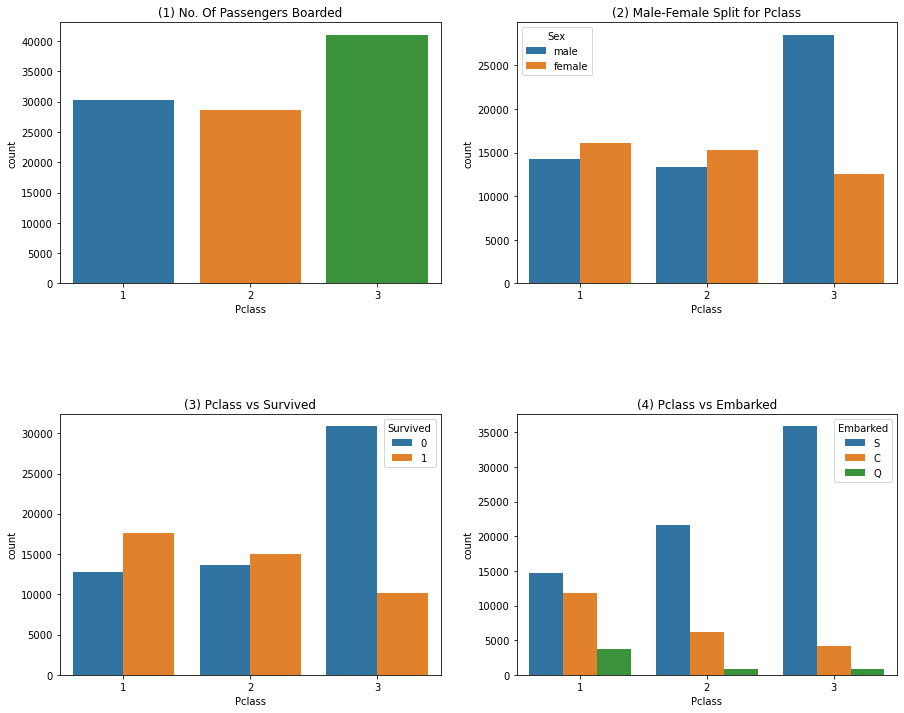

In [10]:
f,ax=plt.subplots(2, 2, figsize=(15,12))
sns.countplot('Pclass', data=df, ax=ax[0,0])
ax[0,0].set_title('(1) No. Of Passengers Boarded')
sns.countplot('Pclass', hue='Sex', data=df, ax=ax[0,1])
ax[0,1].set_title('(2) Male-Female Split for Pclass')
sns.countplot('Pclass', hue='Survived', data=df, ax=ax[1,0])
ax[1,0].set_title('(3) Pclass vs Survived')
sns.countplot('Pclass', hue='Embarked', data=df, ax=ax[1,1])
ax[1,1].set_title('(4) Pclass vs Embarked')
plt.subplots_adjust(wspace=0.2, hspace=0.5)
warnings.filterwarnings(action='ignore') 
plt.show()

## Sex
Male have died more than female. At figure 2-2, male died more than female in all classes. Gender can also be seen to have a significant impact on survival probability. Also, third class male has very little chance of survival.

Survived,0,1,All
Sex,,,
female,12660,31226,43886
male,44566,11548,56114
All,57226,42774,100000


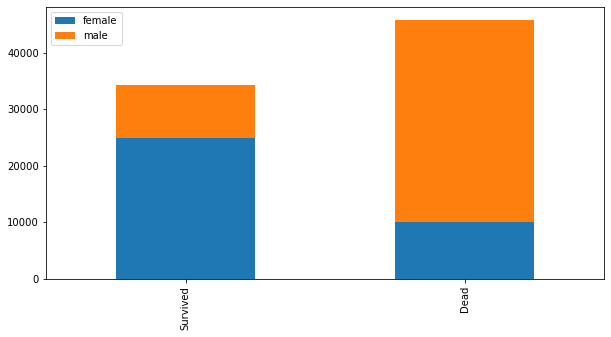

In [11]:
bar_chart('Sex')
pd.crosstab(df['Sex'], df['Survived'], margins=True)

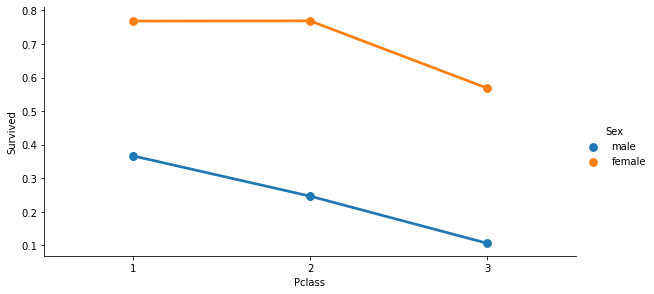

In [12]:
sns.factorplot('Pclass', 'Survived', hue='Sex', data=df, size=4, aspect=2)
warnings.filterwarnings(action='ignore') 

## SibSp , Parch 
Both Sibsp and Parch were more likely to die alone. Both of them are similar features, so they are combined into Family. As expected, those who came alone had the lowest chance of survival in Family. The case with the highest chance of survival is when two people come together, probably because they are a couple so cooperate to save each other.


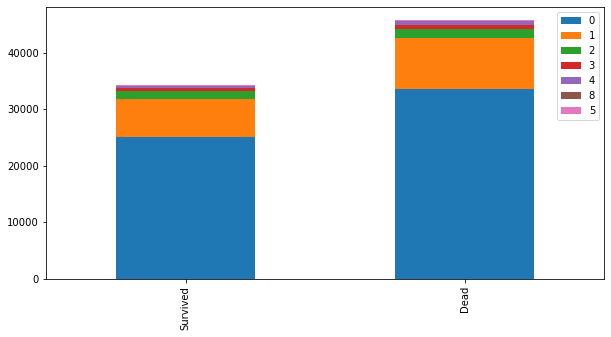

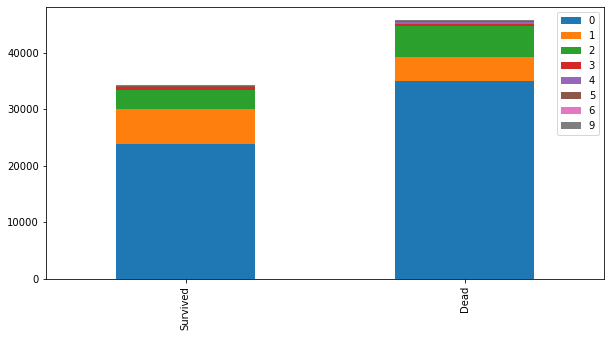

In [13]:
bar_chart('SibSp')
bar_chart('Parch')

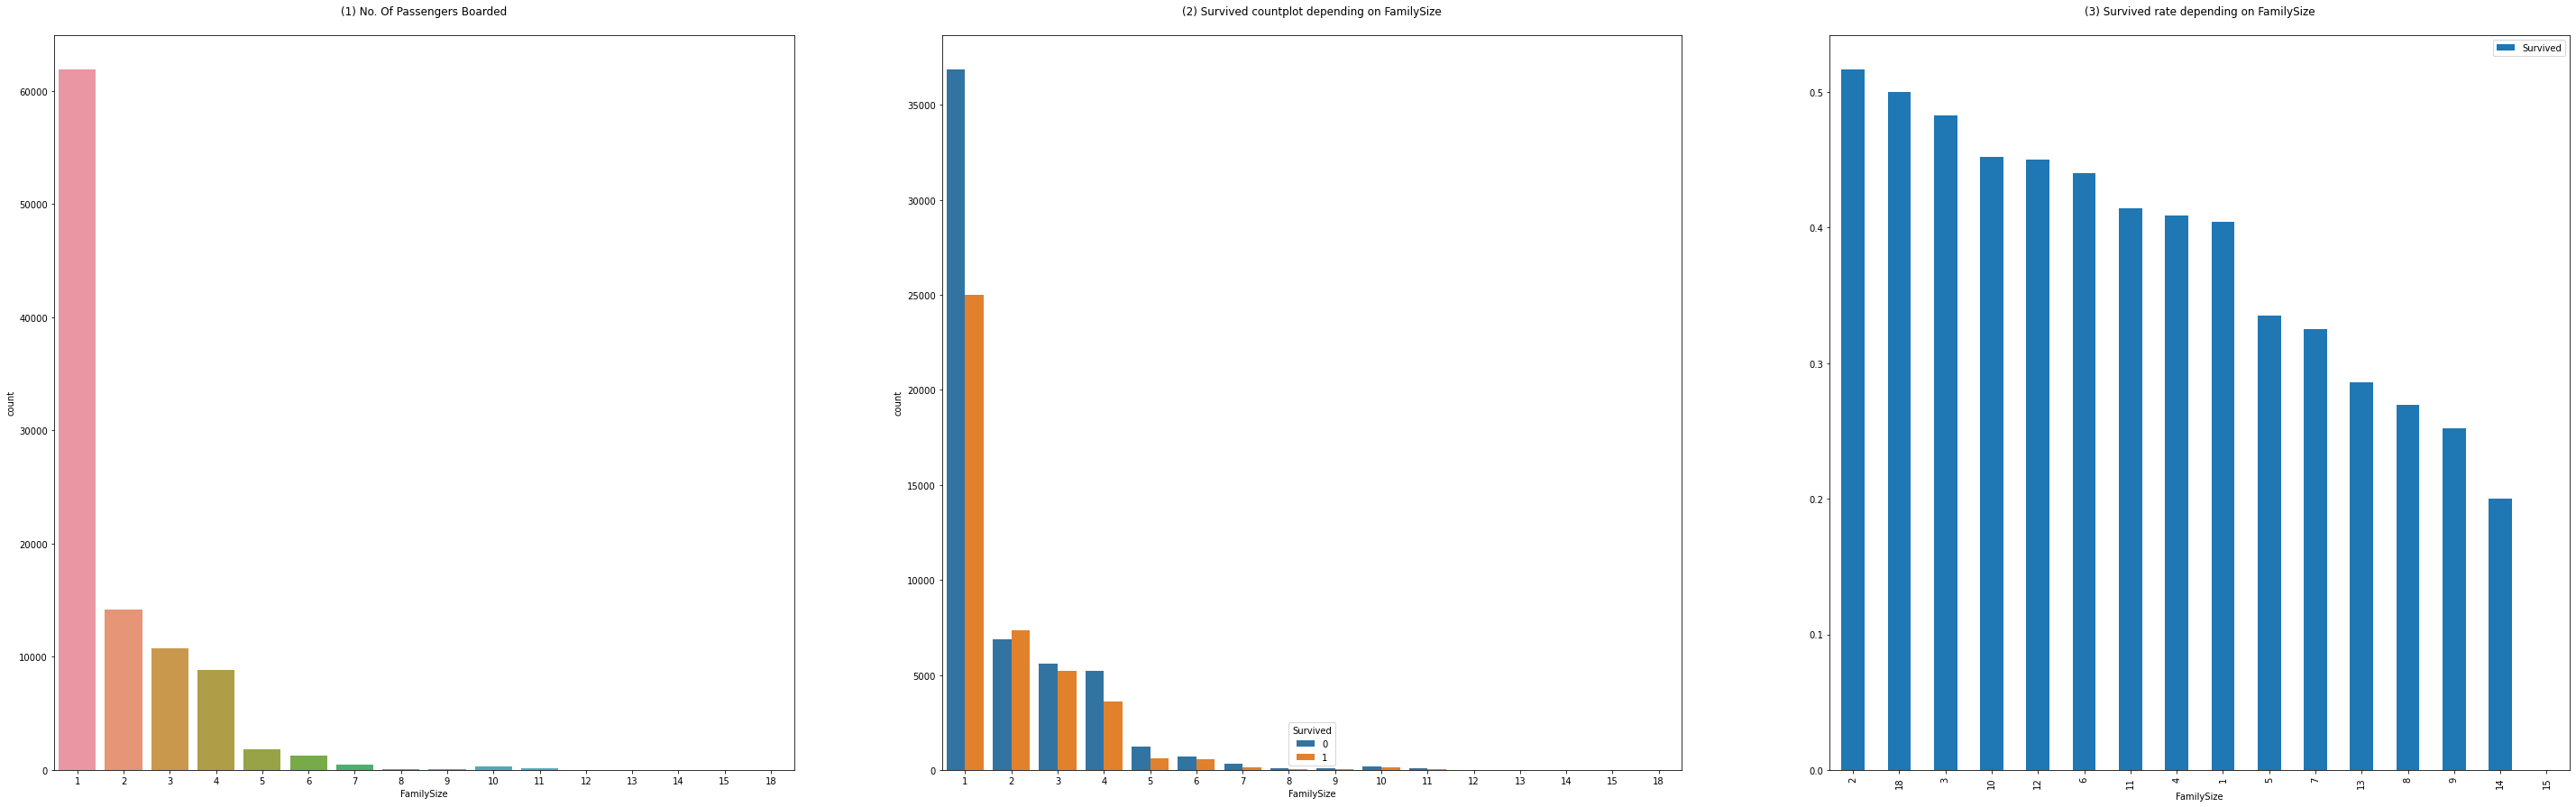

In [14]:
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1
df.drop(['SibSp', 'Parch'], axis=1, inplace=True)
f,ax=plt.subplots(1, 3, figsize=(50,15))
sns.countplot('FamilySize', data=df, ax=ax[0])
ax[0].set_title('(1) No. Of Passengers Boarded', y=1.02)

sns.countplot('FamilySize', hue='Survived', data=df, ax=ax[1])
ax[1].set_title('(2) Survived countplot depending on FamilySize',  y=1.02)

df[['FamilySize', 'Survived']].groupby(['FamilySize'], as_index=True).mean().sort_values(by='Survived', ascending=False).plot.bar(ax=ax[2])
ax[2].set_title('(3) Survived rate depending on FamilySize',  y=1.02)

plt.subplots_adjust(wspace=0.2, hspace=0.5)
warnings.filterwarnings(action='ignore') 
plt.show()

## Embarked

Mostly Embarked S died a lot. C lived rather a lot, and Q had a similar survival rate. Male rode twice as much as a woman in S. The rest, female rode more than male. Also, third class was used a lot in S and first class in C and Q. In C and Q, relatively wealthy people would have ridden.

Survived,0,1,All
Embarked,,,
C,5518,16669,22187
Q,2186,3238,5424
S,49394,22745,72139
All,57098,42652,99750


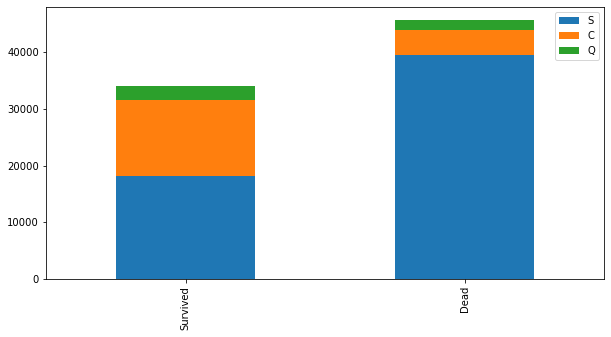

In [15]:
bar_chart('Embarked')
pd.crosstab(df['Embarked'], df['Survived'], margins=True)

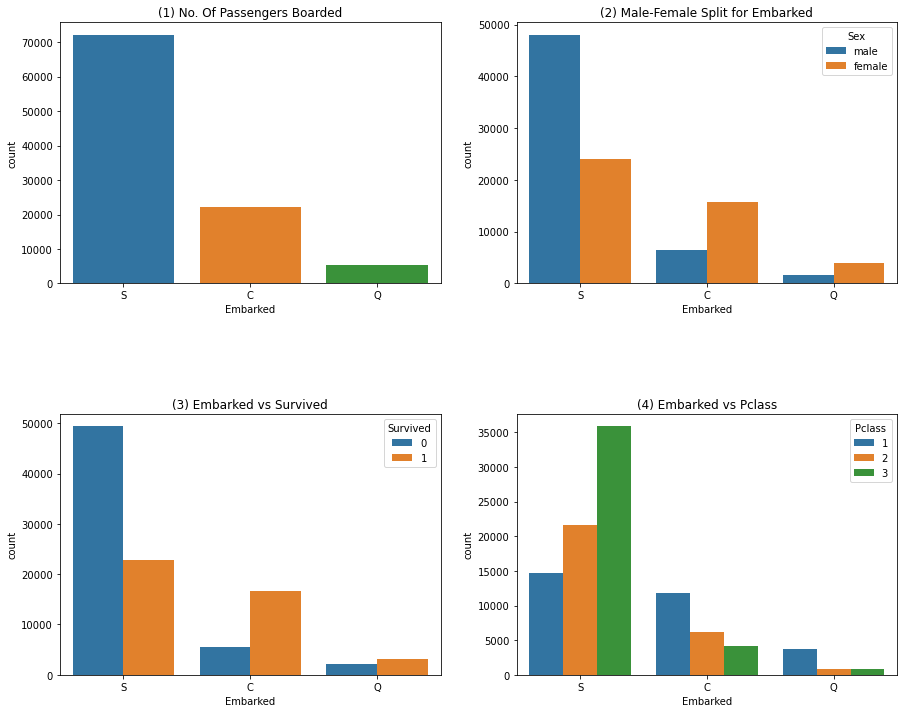

In [16]:
f,ax=plt.subplots(2, 2, figsize=(15,12))
sns.countplot('Embarked', data=df, ax=ax[0,0])
ax[0,0].set_title('(1) No. Of Passengers Boarded')
sns.countplot('Embarked', hue='Sex', data=df, ax=ax[0,1])
ax[0,1].set_title('(2) Male-Female Split for Embarked')
sns.countplot('Embarked', hue='Survived', data=df, ax=ax[1,0])
ax[1,0].set_title('(3) Embarked vs Survived')
sns.countplot('Embarked', hue='Pclass', data=df, ax=ax[1,1])
ax[1,1].set_title('(4) Embarked vs Pclass')
plt.subplots_adjust(wspace=0.2, hspace=0.5)
warnings.filterwarnings(action='ignore') 
plt.show()

## age

Many people, mostly in their 20s and 30s, died. Surprisingly, young children had a half-and-half survival rate, while those in their 40s and older had a slightly higher chance of living. Perhaps people in their 20s and 30s are trying to save people of different ages, resulting in this result.

In [17]:
print('oldest : {:.1f} Years'.format(df['Age'].max()))
print('youngest : {:.1f} Years'.format(df['Age'].min()))
print('average age : {:.1f} Years'.format(df['Age'].mean()))

oldest : 87.0 Years
youngest : 0.1 Years
average age : 38.4 Years


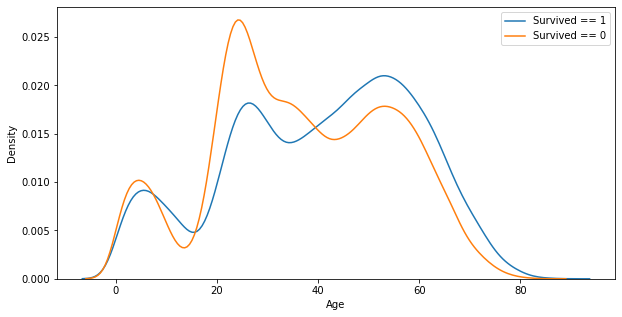

In [18]:
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
sns.kdeplot(df[df['Survived'] == 1]['Age'], ax=ax)
sns.kdeplot(df[df['Survived'] == 0]['Age'], ax=ax)
plt.legend(['Survived == 1', 'Survived == 0'])
plt.show()

# Feature engineering

I first confirm the distribution of Survived through Figure 3. Since it is supposed to be Balanced, I did feature engineering without any other procedures.

In [19]:
# copy data for preventing damage in raw training data
data = df.copy()

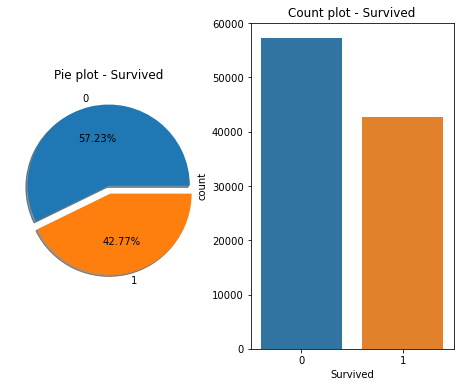

In [20]:
ax, ax = plt.subplots(1, 2, figsize=(8, 6))

df['Survived'].value_counts().plot.pie(explode=[0, 0.1], autopct='%1.2f%%', ax=ax[0], shadow=True)
ax[0].set_title('Pie plot - Survived')
ax[0].set_ylabel('')
sns.countplot('Survived', data=df, ax=ax[1])
ax[1].set_title('Count plot - Survived')
warnings.filterwarnings(action='ignore') 
plt.show()

### Feature extraction 

I checked missing value by using df.isnull().sum(). And I dropped four features that I thought were unnecessary for a few reasons.

Passenger id : Passenger id dropped because it is just index value. 
Name : In Name, no useful information was found and dropped because it was difficult to parameterize. 
Ticket : Ticket seemed to be able to guess the location of the rooms or the number of floors, but Fare and Pclass contain the information so i dropped ticket
Cabin : Cabin dropped because there were too many missing value.


In [21]:
df.isnull().sum()

PassengerId        0
Survived           0
Pclass             0
Name               0
Sex                0
Age             3292
Ticket          4623
Fare             134
Cabin          67866
Embarked         250
FamilySize         0
dtype: int64

In [22]:
df.drop( ['PassengerId','Name','Ticket','Cabin'], axis=1, inplace=True)


I were changed feature Sex and Embarked to number in order to make it easier to learn model.  In case of Sex, female was changed to 0, and male was changed to 1.  Case of Embarked,  changed C to 0, Q to 1, and S to 2.

In [23]:
df['Embarked'] = df['Embarked'].map({'C': 0, 'Q': 1, 'S': 2})

In [24]:
df['Sex'] = df['Sex'].map({'female': 0, 'male': 1})

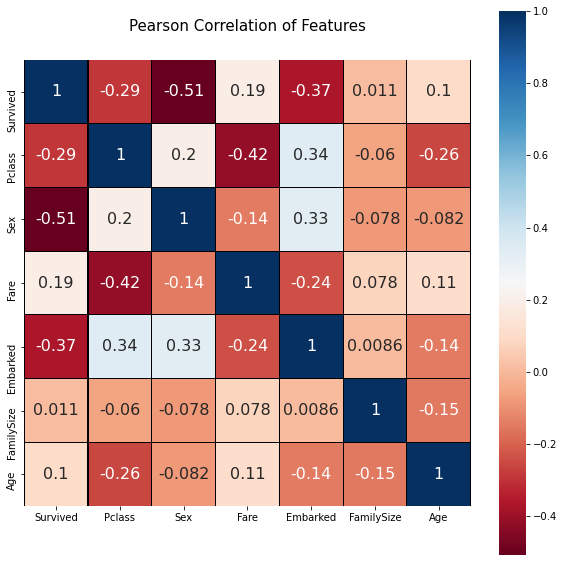

In [25]:
heatmap_data = df[['Survived', 'Pclass', 'Sex', 'Fare', 'Embarked', 'FamilySize', 'Age']] 
colormap = plt.cm.RdBu
plt.figure(figsize=(10, 10))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(heatmap_data.astype(float).corr(), linewidths=0.1, vmax=1.0,
           square=True, cmap=colormap, linecolor='black', annot=True, annot_kws={"size": 16})

del heatmap_data

## Age

There was no feature directly related to Age. According to the P-class, people with a first-class rating are classified as older people. Or I was going to guess the age according to Family Size. But It was complicated and matched the missing value with the average value. For the speed of the model, the number was made according to the range of the age. It is defined smaller than 16 is 0, 16 ~ 32 is 1, 32 ~ 48 is 2, 48 ~64 is 3, larger than 64 is 4.

In [26]:
df['Age'].fillna(df['Age'].mean(), inplace=True)

In [27]:
   
df.loc[ df['Age'] <= 16, 'Age'] = 0
df.loc[(df['Age'] > 16) & (df['Age'] <= 32), 'Age'] = 1
df.loc[(df['Age'] > 32) & (df['Age'] <= 48), 'Age'] = 2
df.loc[(df['Age'] > 48) & (df['Age'] <= 64), 'Age'] = 3
df.loc[ df['Age'] > 64, 'Age'] = 4
    
df.head(10)

,Survived,Pclass,Sex,Age,Fare,Embarked,FamilySize
0,1,1,1,2.0,27.14,2.0,3
1,0,3,1,2.0,13.35,2.0,1
2,0,3,1,0.0,71.29,2.0,4
3,0,3,1,1.0,13.04,2.0,1
4,1,3,1,1.0,7.76,2.0,1
5,0,2,1,2.0,6.71,2.0,1
6,0,3,1,0.0,9.77,2.0,1
7,1,3,0,0.0,31.50,2.0,4
8,0,1,1,1.0,73.02,2.0,4
9,0,2,1,4.0,9.14,0.0,1


## Fare

Fare is most relevant to Pclass in terms of the correction distribution. So I filled the price with the median of each Pclass. At first, I agonized between the Mean and the Median, but decide to put  Median because it depends on the location of the floor and other services, so I thought it would be better to fill the most common and large values Median.

In [28]:
df["Fare"].fillna(df.groupby("Pclass")["Fare"].transform("median"), inplace=True)

## Embarked
Embarked, like Fare, fills the missing values according to Pclass because Correlations are most associated with Pclass. Earlier, Pclass changed to 0, 1 and 2 so I filled the missing value using Median.

In [29]:
df["Embarked"].fillna(df.groupby("Pclass")["Embarked"].transform("median"), inplace=True)

## Cheack for missing value

In [30]:
df.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age           0
Fare          0
Embarked      0
FamilySize    0
dtype: int64

## Modelling

In [31]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [32]:
X=df.drop('Survived',axis=1)
y = df['Survived']

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1004)

##  cross validation (k-fold)

In [34]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
k_fold = KFold(n_splits=10, shuffle=True, random_state=0)

# knn

In [35]:

knn = KNeighborsClassifier(n_neighbors = 13)
scoring = 'accuracy'
score = cross_val_score(knn, X_train, y_train, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)

[0.753    0.74575  0.757    0.7515   0.756125 0.75025  0.7485   0.748875
 0.759    0.7555  ]


In [36]:
score_knn = round(np.mean(score)*100, 2)
score_knn

75.26

# random forest

In [37]:
rf = RandomForestClassifier(n_estimators=13)
scoring = 'accuracy'
score = cross_val_score(rf, X_train, y_train, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)

[0.696375 0.702125 0.69925  0.700375 0.710625 0.7025   0.70625  0.707375
 0.70875  0.705875]


In [38]:
score_rf = round(np.mean(score)*100, 2)
score_rf

70.4

# Naive Bayes

In [39]:
nb = GaussianNB()
scoring = 'accuracy'
score = cross_val_score(nb, X_train, y_train, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)

[0.737    0.728125 0.740125 0.734375 0.73775  0.731125 0.7295   0.725
 0.741125 0.742875]


In [40]:
score_nb = round(np.mean(score)*100, 2)
score_nb

73.47

# Linear_SVC

In [41]:
#l_svc = LinearSVC()
#scoring = 'accuracy'
#score = cross_val_score(l_svc, X_train, y_train, cv=k_fold, n_jobs=1, scoring=scoring)
#print(score)

In [42]:
#score_l_svc = round(np.mean(score)*100, 2)
#score_l_svc

# LogesticRegression

In [43]:
lr = LogisticRegression()
scoring = 'accuracy'
score = cross_val_score(lr, X_train, y_train, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)
warnings.filterwarnings(action='ignore') 

[0.76275  0.7605   0.76675  0.77075  0.7745   0.768125 0.766125 0.763375
 0.764875 0.772125]


In [44]:
score_legression = round(np.mean(score)*100, 2)
score_legression

76.7

## conclusion

In [45]:
models = pd.DataFrame({
    'Model': ['KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes' ],
    'Score': [score_knn, score_legression, 
              score_rf, score_nb]})
models.sort_values(by='Score', ascending=False)

,Model,Score
1,Logistic Regression,76.70
0,KNN,75.26
3,Naive Bayes,73.47
2,Random Forest,70.40


# Evaluation

### Internal evaluation

Accuracy alone cannot accurately evaluate performance, so we use Roc curve that considers Sensitivity and Specificity together. I used Roc curve in my internal assessment. The values of auc, which obtained the under area of the roc-curve respectively, were 0.815(knn), 0.813(nb), and 0.825(lr), similar to the order of the accuracy. In other words, both logistic regression 's accruacy and rock curve sides showed better performance.

In [46]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [47]:
def draw_model_roc(model,name):
    ns_probs = [0 for _ in range(len(y_test))]
    lr_probs = model.predict_proba(X_test)
    lr_probs = lr_probs[:, 1]

    ns_auc = roc_auc_score(y_test, ns_probs)
    lr_auc = roc_auc_score(y_test, lr_probs)
    print('No Skill: ROC AUC=%.3f' % (ns_auc))
    print('%s     : ROC AUC=%.3f' % (name,lr_auc))
    ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
    lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)

    plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
    plt.plot(lr_fpr, lr_tpr, marker='.', label=name)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend()
    plt.show()

No Skill: ROC AUC=0.500
knn     : ROC AUC=0.815


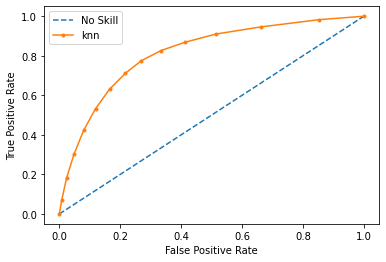

In [48]:
knn.fit(X_train,y_train)
draw_model_roc(knn,'knn')

No Skill: ROC AUC=0.500
nb     : ROC AUC=0.813


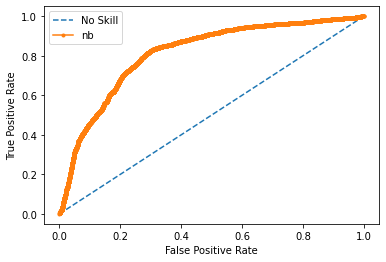

In [49]:
nb.fit(X_train,y_train)
draw_model_roc(nb,'nb')

No Skill: ROC AUC=0.500
lr     : ROC AUC=0.825


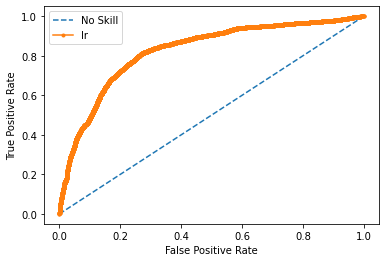

In [50]:
lr.fit(X_train,y_train)
draw_model_roc(lr,'lr')
warnings.filterwarnings(action='ignore') 

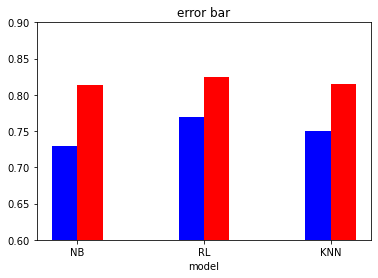

In [51]:
result_acc = {0.73,0.77,0.75}
result_auc = {0.813, 0.825, 0.815}
model = {'NB','RL','KNN'}
index = np.arange(3)
plt.bar(index, result_acc, color = "b", align='edge', width=0.2, label='accuracy')
plt.bar(index+0.2, result_auc, color = "r", align='edge', width=0.2, label='auc')
plt.xticks(index+0.2, model)
plt.xlabel('model')
plt.title('error bar')
plt.ylim([0.6, 0.9])
plt.show()

### External evaluation

Three models were also measured in external evaluation. As before, the highest score in logistic regression was achieved. Similarly, by 0.81(knn), 0.81(nb), 0.83(lr) the logistic regression showed the highest performance in external evaluation.

In [52]:
import gc
from sklearn.metrics import roc_auc_score, plot_roc_curve

0.7467601999184007


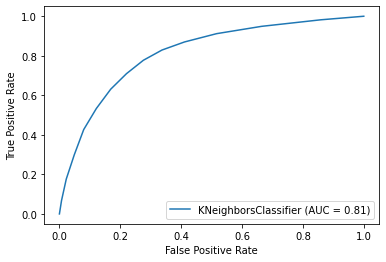

In [53]:
result = []
for train_index, _ in k_fold.split(X_train, y_train):
  x, y = X_train.iloc[list(train_index)], y_train.iloc[list(train_index)]
  clf = KNeighborsClassifier(n_neighbors = 13).fit(x, y)
  y_test_pred = clf.predict(X_test)
  result.append(roc_auc_score(y_test, y_test_pred))
  gc.collect()
print(np.array(result).mean())
plot_roc_curve(clf, X_test, y_test)  


0.7269188086495308


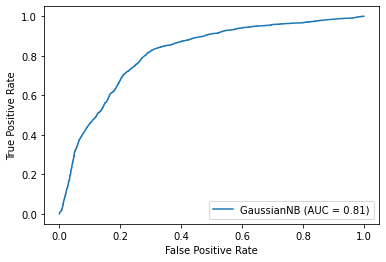

In [54]:
result = []
for train_index, _ in k_fold.split(X_train, y_train):
  x, y = X_train.iloc[list(train_index)], y_train.iloc[list(train_index)]
  clf = GaussianNB().fit(x, y)
  y_test_pred = clf.predict(X_test)
  result.append(roc_auc_score(y_test, y_test_pred))
  gc.collect()
print(np.array(result).mean())
plot_roc_curve(clf, X_test, y_test)  


0.7648045695634436


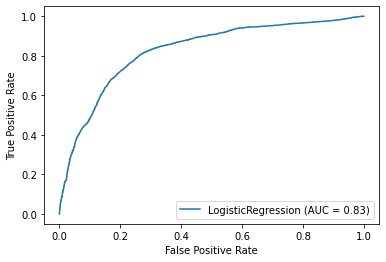

In [55]:
warnings.filterwarnings(action='ignore') 

result = []
for train_index, _ in k_fold.split(X_train, y_train):
  x, y = X_train.iloc[list(train_index)], y_train.iloc[list(train_index)]
  clf = LogisticRegression().fit(x, y)
  y_test_pred = clf.predict(X_test)
  result.append(roc_auc_score(y_test, y_test_pred))
  gc.collect()
print(np.array(result).mean())
plot_roc_curve(clf, X_test, y_test)  

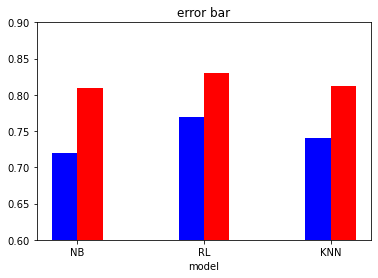

In [56]:
result_acc_2 = {0.72,0.77,0.74}
result_auc_2 =  {0.81,0.83,0.812}
model_2 = {'NB','RL','KNN'}
index = np.arange(3)
plt.bar(index, result_acc_2, color = "b", align='edge', width=0.2, label='accuracy')
plt.bar(index+0.2, result_auc_2, color = "r", align='edge', width=0.2, label='auc')
plt.xticks(index+0.2, model_2)
plt.xlabel('model')
plt.title('error bar')
plt.ylim([0.6, 0.9])
plt.show()

# conclusion

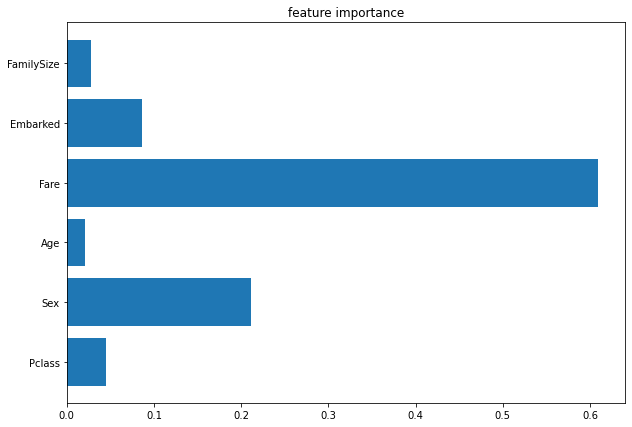

In [57]:
plt.figure(figsize=(10,7))
rf.fit(X_train,y_train)
plt.barh(X_train.columns,rf.feature_importances_)
plt.title('feature importance')
plt.show()

# this feature importance is by random forest

A number of features were analyzed, and feature engineering was performed, such as filling the missing value and dropping unnecessary features by using correlation. I chose several models with high scores using several models(knn, logistic regression, random forest, SVM gaussianNB, and so on). Using the selected models, internal evaluation was carried out using the roc-curve. We also used the test set to draw the roc-curve and perform the external evaluation. As a result, logistic regression is the best model.

What was different from my expectation was that the random forest had a low score. This is because random forest works well on large datasets and has high accuracy. After considering the reason, I think if it was because overfitting occurred and there was a little noise in the prediction result. I also checked that the data set I received was not real data, Sometimes there was strange data. So I guess that's why the random forest score is low because there are wrong data in between

As expected, Fare and Sex were important features of survival rates. A person with a high Fare would not be assigned to a third class downstairs with a high density of people. The more expensive Fare is, the higher floor and the less the density of people, the safer the room will be assigned. There were also life jacket and lifeboats near the first class room. That's why Fare has important feature results. Sex is also an important feature. Just as the Titanic movie shows a scene in which women and children are put on a lifeboat first, there must have been a cultural aspect of saving women and children first in real situation. 

The importance of Sex was high, while the importance of Age was lower than expected. This is because both must be of high importance according to the cultural aspect of rescuing the weak first. I guessed the reason is that children and the elderly are have the lack of the ability to escape. In addition to the features given, I looked at the Titanic's design and found that there were other factors related to survival rates, such as poor Titanic design. 

Through this final term, I realized that feature engineering was important and need put a lot of effort and time, not just to import package and train models. I also realized that the accuracy is different each models we learned in theory. And each model's importance of features and result are different. Finally, there were some results that were slightly different from the hypotheses I set. So I felt that detailed analysis was important.


### reference
https://www.youtube.com/channel/UCxP77kNgVfiiG6CXZ5WMuAQ
https://www.kaggle.com/c/titanic/code?competitionId=3136&sortBy=voteCount
https://www.kaggle.com/startupsci/titanic-data-science-solutions
https://www.kaggle.com/daehungwak/guide-kor-dg
